In [1]:
import pandas as pd
import numpy as np
import time

In [188]:
while True:
    try:
        basics = pd.read_csv('H:\\MSIT 2nd Year\\DADV\\Selenium\\IMDB Data\\Data\\basics.tsv',delimiter='\t',encoding='utf-8')
        break
    except:
        print(" not reading..")
        time.sleep(5)
        pass

In [3]:
while True:
    try:
        ratings = pd.read_csv('H:\\MSIT 2nd Year\\DADV\\Selenium\\IMDB Data\\Data\\ratings.tsv',delimiter='\t',encoding='utf-8')
        break
    except:
        print(" not reading.. just waiting")
        time.sleep(5)
        pass

In [170]:
df = pd.merge(basics,ratings,on='tconst')

Q1. find the average rank of the 10 most popular movies between 2000-2009 (inclusive)

In [114]:
# df["popular"] = (0.4*df.numVotes)*(0.35*df.averageRating)
# df['popular'] = (df['popular']/df['popular'].max())*100

In [125]:
df["popular"] = (df.averageRating)
df['popular'] = (df['popular']/df['popular'].max())*100
df = df[df['startYear']>=10000]

In [212]:
#if rank is considered as the ranking paramenter
# df["rank"] = df["popular"].rank(ascending=False)
# df.head()

In [121]:
df["startYear"] = pd.to_numeric(df["startYear"], errors='coerce')

In [189]:
tempDf=df[df.titleType=="movie"]
tempDf = tempDf[df.startYear>1999]
tempDf = tempDf[tempDf.startYear<2010]

In [91]:
#if popularity is considered as the ranking paramenter
tempDf.sort_values("popular", axis = 0, ascending = False, inplace = True, na_position ='last')

tempDf.head(10)["averageRating"].mean()

8.580000000000002

In [92]:
#if rank considered as the ranking paramenter
#tempDf["rank"].mean()

Q2: find the year in the 1900s when the average rank increased the most, compared to the previous year. 
(Ignore movies with votes < 1000)

In [190]:
tempDf=df[df.titleType=="movie"]
tempDf = tempDf[df.startYear>=1900]
tempDf = tempDf[tempDf.startYear<2000]

In [94]:
tempDf = tempDf[tempDf.numVotes>1000]
# tempDf.head()

In [95]:
tempD = tempDf.groupby('startYear').agg(
    # Get max of the duration column for each group
    mp=('popular', np.mean)
    # Apply a lambda to date column
#     num_days=("date", lambda x: (max(x) - min(x)).days)    
).reset_index()

In [96]:
# tempD

In [97]:
index = 0.0
flag = True
prevMp = 0.0
maximum = 0.0
for i in range(len(tempD.mp)):
    if flag:
        flag = False
        prevMp = float(tempD.mp[i])
        pass
    if (float(tempD.mp[i])-prevMp) > maximum:
        maximum = (float(tempD.mp[i])-prevMp)
        index = i
    prevMp =  float(tempD.mp[i])
print(int(tempD.startYear[index]))


    

1994


Q3. find the expected average rank for 2013 using linear regression. How good is this regression? 

In [98]:
tempD

,startYear,mp
0,1911.0,0.070694
1,1913.0,0.049392
2,1914.0,0.061656
3,1915.0,0.190240
4,1916.0,0.276876
5,1917.0,0.046095
6,1918.0,0.072366
7,1919.0,0.072460
8,1920.0,0.271984
9,1921.0,0.529994


In [99]:
import seaborn as sns; sns.set()
corr = tempD.corr()
corr['mp'][0]

0.8073025576203204

In [100]:
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [101]:
X = tempD.startYear.values.reshape(-1,1)
Y = tempD.mp.values.reshape(-1,1)

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [103]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
y_pred = regressor.predict(X_test)

In [105]:
df2 = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
df2

,Actual,Predicted
0,0.061656,0.056565
1,0.459112,0.170628
2,0.306067,0.585403
3,0.335626,0.460971
4,0.470654,0.720205
5,0.477501,0.346908
6,0.625838,0.502448
7,0.310951,0.481709
8,0.801974,0.834268
9,1.541010,0.937962


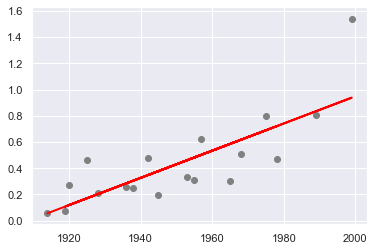

In [106]:
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [107]:
x = np.array([2013.0])
print("Expected average rank in terms of mean popularity, for 2013: "+str(regressor.predict(x.reshape(1,-1))[0][0]))

Expected average rank in terms of mean popularity, for 2013: 1.0831330029543444


Q6. find the correlation between rank and votes for each year in the 1900s. 
By how much did the correlation coefficient grow each year? 

In [179]:
df["popular"] = (df.averageRating)
df['popular'] = (df['popular']/df['popular'].max())*100
df["startYear"] = pd.to_numeric(df["startYear"], errors='coerce')
df = df[df['numVotes']>=50000]

In [191]:
tempDf = df[df.startYear>=1900]
tempDf = tempDf[tempDf.startYear<2000]
Y = pd.DataFrame()
Y = tempDf.iloc[:, [5,10,11]]
Y.sort_values("startYear", axis = 0, ascending = True, inplace = True, na_position ='last')

In [185]:
Y

,startYear,numVotes,popular
2547,1920.0,51942,81.0
3025,1921.0,102354,83.0
3286,1922.0,83243,79.0
4005,1925.0,92448,82.0
4803,1926.0,74164,81.0
4492,1927.0,149153,83.0
5959,1930.0,54511,80.0
6682,1931.0,153552,85.0
6772,1931.0,60631,78.0
6912,1931.0,132706,83.0


In [186]:
years = list(Y['startYear'].unique())
yearCorr = pd.DataFrame()
for year in years:
    X=Y[Y['startYear']==year].iloc[:,[1,2]]
    corr = X.corr()
    corr = corr['numVotes'][1]
    newRow = {'Correlation':corr,'Year':year}
    yearCorr = yearCorr.append(newRow, ignore_index=True)
yearCorr = yearCorr.reindex(columns=['Year', 'Correlation'])
yearCorr

,Year,Correlation
0,1920.0,NaN
1,1921.0,NaN
2,1922.0,NaN
3,1925.0,NaN
4,1926.0,NaN
5,1927.0,NaN
6,1930.0,NaN
7,1931.0,0.997849
8,1933.0,1.000000
9,1934.0,NaN


In [110]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,popular
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short",5.6,1559,0.043263
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,\N,5,"Animation,Short",6.1,188,0.005683
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance",6.5,1221,0.039328
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,\N,\N,"Animation,Short",6.1,114,0.003446
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short",6.1,1950,0.058944
